<a href="https://colab.research.google.com/github/artvanila/data_projects/blob/main/Cross_Masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analýza transakcí E-shop

## Úvod

V následujícíсh pololožkách odpovíme na tyto dotazy:


> 1. Na jaké kategorii produktů máme největší obrat? A zajímalo by mě i jestli se to v jednotlivých měsících mění.
> 2. Který den v týdnu je nejsilnější na počet objednávek?
> 3. Která kategorie se prodává nejčastěji spolu s produkty z kategorie Televize (resp. jsou spolu
v jedné objednávce)?
> 4. Od 18. 3. 2022 jsem klukům z marketingu navýšil budget na online marketingových
platformách (Google Ads, Sklik, Facebook). Dokážeš mi říct, jestli to vedlo k nějaké změně
v prodeji?
> 5. Na seznamu produktů v E-shopu máme produkty nějak řazeny. Vždy stejně a nemění se to.
Myslím, že to je řazeno podle toho, jak je přidáváme postupně do databáze. Pak si je
samozřejmě může zákazník seřadit sám podle ceny. Myslíš, že hraje roli, jaké mají ty produkty
na produktových listech pořadí, tedy jak jsou seřazeny defaultně? Je mi asi jasné, že ze
současných dat to nevyčteš. Máš nějaký návrh, co bychom tedy potřebovali začít měřit,
abychom se v tomto tématu posunuli dále?
> 6. As a data analyst working with online marketing data and Google Analytics 4 (GA4), you areaware of the challenges posed by GDPR regulations and cookie consent requirements on
data collection. Using a Large Language Model (like ChatGPT), outline the key impacts of
GDPR and cookie consent on web analytics data collection. Then, generate a plan to mitigate
these data limitations while ensuring compliance with GDPR. Provide the specific prompts
you used with the LLM and summarize the responses you received.

Importujeme potřebné knihovny, dataset a vytvoříme potřebné funkce.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# upravit cestu podle umístění datasetu jinak sešit nebude funkční
file_path = '/content/drive/MyDrive/Colab Notebooks/Data.xlsx'

In [7]:
def primary_analysis(df):

    display("Information about the dataframe:")
    display(df.info())

    display("\nFirst 5 rows of the dataframe:")
    display(df.head())

    display("\nDescription of numerical columns:")
    display(df.describe())

    display("\nNumber of duplicate entries in the dataset:")
    display(df.duplicated().sum())

    display("\nNumber of missing values in the dataset:")
    display(df.isna().sum())

    display("\nFrequency distributions for categorical columns:")

    for column in df.select_dtypes(include=['object', 'category']).columns:
        display(f"\nColumn '{column}':")
        display(df[column].value_counts())

In [8]:
transactions = pd.read_excel(file_path, sheet_name="Transactions")

In [9]:
products = pd.read_excel(file_path, sheet_name="Products")

In [10]:
primary_analysis(transactions)

'Information about the dataframe:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  141 non-null    int64         
 1   Date            141 non-null    datetime64[ns]
 2   Product name    141 non-null    object        
 3   Quantity        141 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.5+ KB


None

'\nFirst 5 rows of the dataframe:'

,Transaction ID,Date,Product name,Quantity
0,1,2022-02-01,Samsung QN55Q80T,1
1,1,2022-02-01,Apple iPhone 12 Pro,1
2,2,2022-02-02,Lenovo Tab P11 Pro,2
3,2,2022-02-02,Xiaomi Poco X3 Pro,1
4,3,2022-02-03,Bose QuietComfort Earbuds,2


'\nDescription of numerical columns:'

,Transaction ID,Date,Quantity
count,141.000000,141,141.000000
mean,44.673759,2022-03-25 18:33:11.489361664,1.156028
min,1.000000,2022-02-01 00:00:00,1.000000
25%,24.000000,2022-02-24 00:00:00,1.000000
50%,50.000000,2022-03-22 00:00:00,1.000000
75%,64.000000,2022-04-23 00:00:00,1.000000
max,78.000000,2022-05-29 00:00:00,2.000000
std,23.034290,NaN,0.364176


'\nNumber of duplicate entries in the dataset:'

0

'\nNumber of missing values in the dataset:'

,0
Transaction ID,0
Date,0
Product name,0
Quantity,0


'\nFrequency distributions for categorical columns:'

"\nColumn 'Product name':"

,count
Product name,
Bose QuietComfort Earbuds,16
Xiaomi Poco X3 Pro,14
LG OLED55CX,14
Sony WH-1000XM4,14
JBL Charge 4,13
Samsung Galaxy Tab S7+,12
Samsung QN55Q80T,10
Apple iPhone 12 Pro,10
Lenovo Tab P11 Pro,10


In [11]:
# opravíme názvy kolonek aby odpovídaly stylu
transactions.columns = transactions.columns.str.lower()
transactions = transactions.rename(columns={"transaction id": "transaction_id"})
transactions = transactions.rename(columns={"product name": "product_name"})

In [12]:
primary_analysis(products)

'Information about the dataframe:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product name  12 non-null     object
 1   Category      12 non-null     object
 2   Price         12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 420.0+ bytes


None

'\nFirst 5 rows of the dataframe:'

,Product name,Category,Price
0,JBL Charge 4,Audio,2990
1,Bose QuietComfort Earbuds,Audio,7490
2,Sony WH-1000XM4,Audio,10490
3,LG OLED55CX,Televize,38990
4,Samsung QN55Q80T,Televize,29990


'\nDescription of numerical columns:'

,Price
count,12.000000
mean,20756.666667
std,13504.836395
min,2990.000000
25%,9740.000000
50%,21490.000000
75%,28490.000000
max,44990.000000


'\nNumber of duplicate entries in the dataset:'

0

'\nNumber of missing values in the dataset:'

,0
Product name,0
Category,0
Price,0


'\nFrequency distributions for categorical columns:'

"\nColumn 'Product name':"

,count
Product name,
JBL Charge 4,1
Bose QuietComfort Earbuds,1
Sony WH-1000XM4,1
LG OLED55CX,1
Samsung QN55Q80T,1
LG 75NANO81,1
Apple iPhone 12 Pro,1
Samsung Galaxy S21 Ultra,1
Xiaomi Poco X3 Pro,1


"\nColumn 'Category':"

,count
Category,
Audio,3
Televize,3
Mobilní telefony,3
Tablety,3


In [13]:
# opravíme názvy kolonek aby odpovídaly stylu
products.columns = products.columns.str.lower()
products = products.rename(columns={"product name": "product_name"})

Import probíhl úspěšně. Po rychlé kontrole datasetu lze konstatovat, že data vypadají v pořádku. Můžeme tedy přejít k analýze dat (EDA) a zaměřit se na zodpovězení konkrétních dotazů.

## EDA

Na jaké kategorii produktů máme největší obrat? A zajímalo by mě i jestli se to v jednotlivých měsících mění.

In [14]:
merged = pd.merge(transactions, products, on="product_name", how="inner")  # předtím jak odpovídat na dotaz musíme spojit dvě tabulky na základě sloupce Product Name

In [15]:
merged.head(10)

,transaction_id,date,product_name,quantity,category,price
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990
2,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490
5,4,2022-02-04,Samsung Galaxy S21 Ultra,1,Mobilní telefony,25490
6,5,2022-02-05,LG OLED55CX,1,Televize,38990
7,5,2022-02-05,Bose QuietComfort Earbuds,1,Audio,7490
8,6,2022-02-06,JBL Charge 4,2,Audio,2990
9,7,2022-02-07,Apple iPad Air,1,Tablety,17990


In [16]:
merged['sales'] = merged['quantity'] * merged['price'] # doplníme sloupec Sales pro výpočet obrátu

In [17]:
merged.head(10)

,transaction_id,date,product_name,quantity,category,price,sales
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990
2,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980
5,4,2022-02-04,Samsung Galaxy S21 Ultra,1,Mobilní telefony,25490,25490
6,5,2022-02-05,LG OLED55CX,1,Televize,38990,38990
7,5,2022-02-05,Bose QuietComfort Earbuds,1,Audio,7490,7490
8,6,2022-02-06,JBL Charge 4,2,Audio,2990,5980
9,7,2022-02-07,Apple iPad Air,1,Tablety,17990,17990


In [18]:
category_revenue = merged.groupby('category')['sales'].sum().reset_index().sort_values(by='sales', ascending=False) # seskupíme podle kategorií a spočítáme obrát pro každou z nich

<ipython-input-19-a4dbc04cd77e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sales", y="category", data=category_revenue, palette="Blues_r")


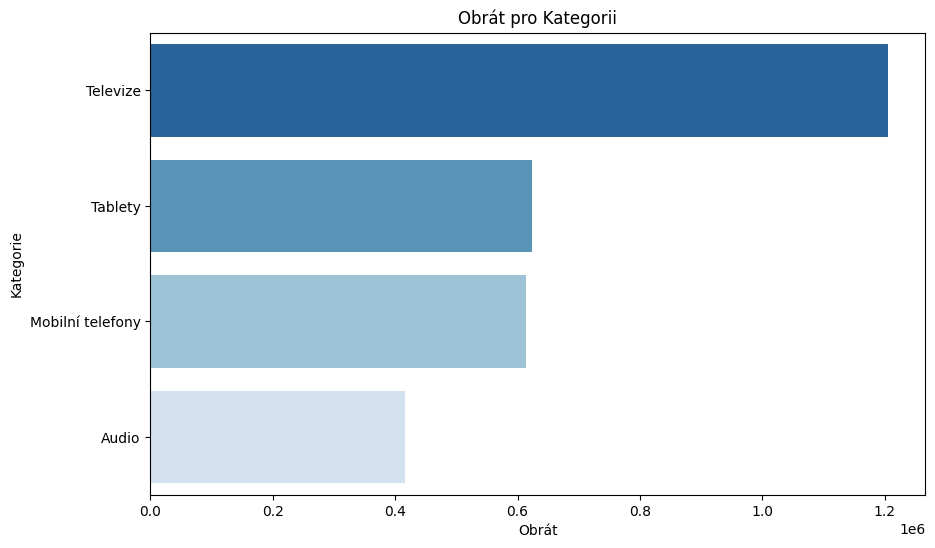

In [19]:
# Vytvoříme sloupcový graf pro celkový obrát pro kategorie
plt.figure(figsize=(10, 6))
sns.barplot(x="sales", y="category", data=category_revenue, palette="Blues_r")
plt.xlabel("Obrát")
plt.ylabel("Kategorie")
plt.title("Obrát pro Kategorii")
plt.show()

Největší obrat tvoří prodej produktů v kategorii Televize

Spočítáme obrat kategorií za jednotlivé měsíce a vizualizujeme jeho vývoj.

In [20]:
# přidáme sloupec kde máme uvedeny jen měsíc a rok
merged["year_month"] = merged["date"].dt.to_period("M")
merged['year_month'] = merged['year_month'].dt.to_timestamp()

<ipython-input-21-e0b4362f7f5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['cumulative_sales'] = category_data['sales'].cumsum()
<ipython-input-21-e0b4362f7f5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['cumulative_sales'] = category_data['sales'].cumsum()
<ipython-input-21-e0b4362f7f5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

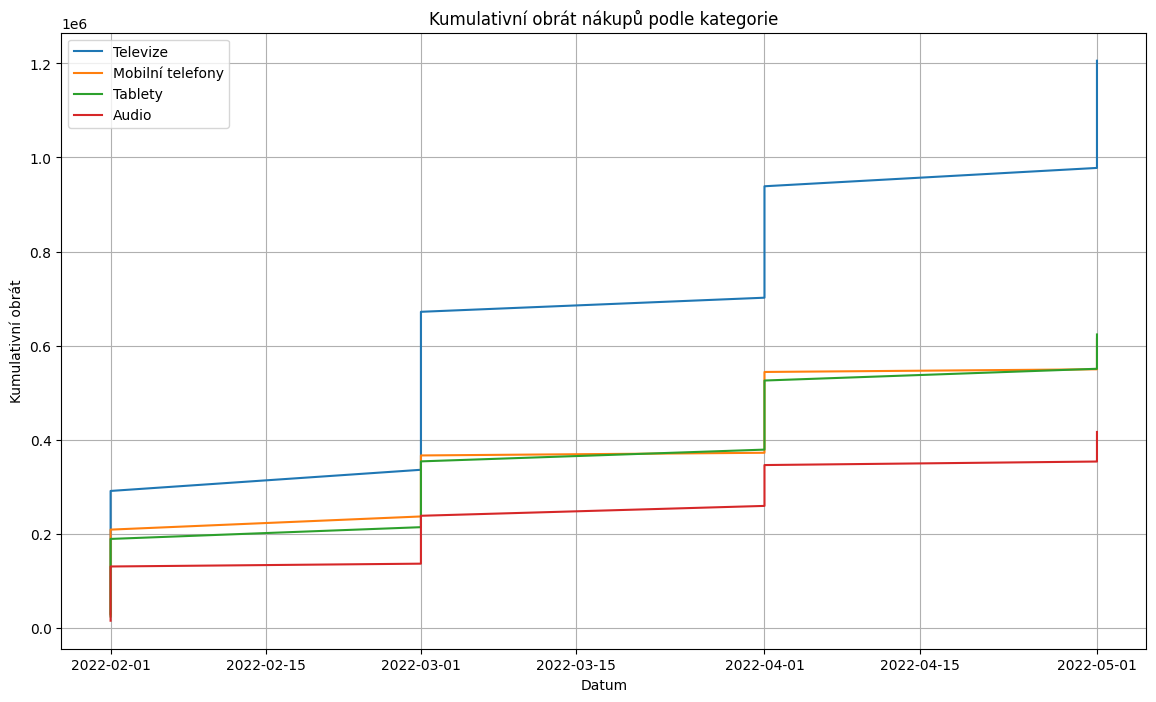

In [21]:
# Vytvoříme spojnicový graf
plt.figure(figsize=(14, 8))
for category in merged['category'].unique():
    category_data = merged[merged['category'] == category]
    category_data['cumulative_sales'] = category_data['sales'].cumsum()
    plt.plot(category_data['year_month'], category_data['cumulative_sales'], label=category)
plt.title('Kumulativní obrát nákupů podle kategorie')
plt.xlabel('Datum')
plt.ylabel('Kumulativní obrát')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Tendence ukazují, že produkty z kategorie televize mají vyšší obrat. Avšak není tomu tak vždy – na přelomu února a března byl obrat v kategorii mobilních telefonů a tabletů vyšší.

Který den v týdnu je nejsilnější na počet objednávek?

In [22]:
# doplníme názvy dnů v týdnu
merged['day_of_week'] = merged['date'].dt.day_name()

In [23]:
merged.head()

,transaction_id,date,product_name,quantity,category,price,sales,year_month,day_of_week
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,2022-02-01,Tuesday
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,2022-02-01,Tuesday
2,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,2022-02-01,Wednesday
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,2022-02-01,Wednesday
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,2022-02-01,Thursday


In [24]:
unique_orders_per_day = merged.groupby("day_of_week")["transaction_id"].nunique().reset_index()
unique_orders_per_day.columns = ["day_of_week", "unique_orders"]
unique_orders_per_day = unique_orders_per_day.sort_values(by="unique_orders", ascending=False)

<ipython-input-25-56892d087536>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unique_orders", y="day_of_week", data=unique_orders_per_day, palette="Blues_r")


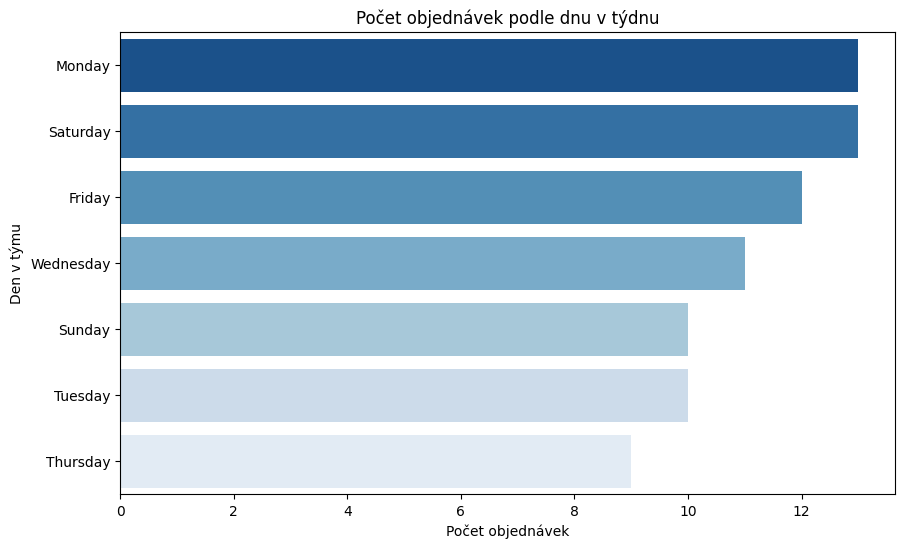

In [25]:
# Vytvoříme sloupcový graf pro celkový obrát
plt.figure(figsize=(10, 6))
sns.barplot(x="unique_orders", y="day_of_week", data=unique_orders_per_day, palette="Blues_r")
plt.xlabel("Počet objednávek")
plt.ylabel("Den v týmu")
plt.title("Počet objednávek podle dnu v týdnu")
plt.show()

Sobota je nejsilnějším dnem v týdnu z hlediska počtu objednávek. Lze to vysvětlit tím, že sobota je volný den, což znamená, že zákazníci mají více času na nákup.

Která kategorie se prodává nejčastěji spolu s produkty z kategorie Televize(resp. jsou spolu v jedné objednávce)?

In [26]:
tv_orders = merged[merged['category'] == 'Televize']
other_categories = merged[merged['transaction_id'].isin(tv_orders['transaction_id']) & (merged['category'] != 'Televize')]
category_counts = other_categories['category'].value_counts()
category_counts

,count
category,
Audio,13
Mobilní telefony,12
Tablety,7


Audio je nejčastější kategorie, která se prodává spolu s kategorií Televize. Lze to vysvětlit tím, že zákazníci často preferují vytvoření domácího kina.

Od 18. 3. 2022 jsem klukům z marketingu navýšil budget na online marketingových
platformách (Google Ads, Sklik, Facebook). Dokážeš mi říct, jestli to vedlo k nějaké změně
v prodeji?

In [27]:
# seřadíme podle data a spočítáme kumulativní obrát
merged['date'] = pd.to_datetime(merged['date'])
merged_sorted = merged.sort_values(by='date')
merged_sorted['cumulative_sales'] = merged_sorted['sales'].cumsum()

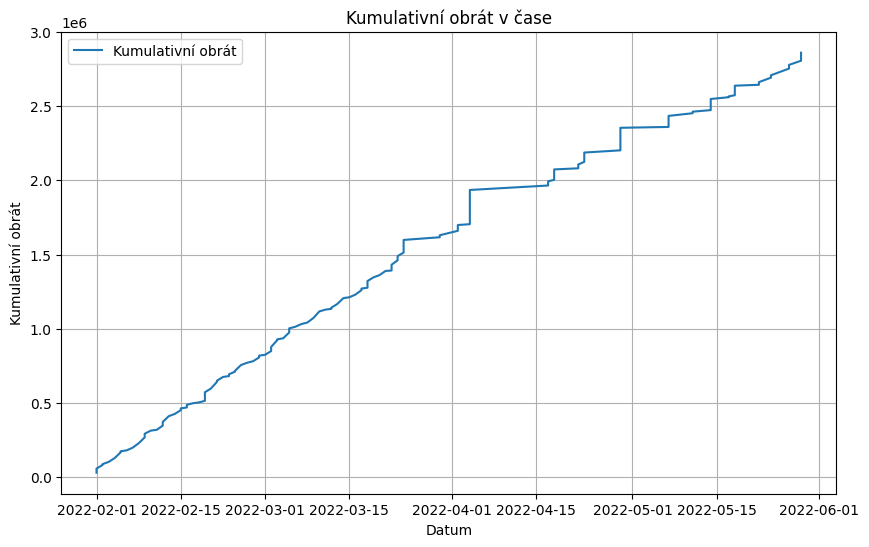

In [28]:
# Pro vizualizaci vytvoříme spojnicový graf
plt.figure(figsize=(10, 6))
plt.plot(merged_sorted['date'], merged_sorted['cumulative_sales'], label='Kumulativní obrát')
plt.xlabel("Datum")
plt.ylabel("Kumulativní obrát")
plt.title("Kumulativní obrát v čase")
plt.grid(True)
plt.legend()
plt.show()

Růst lze hodnotit jako lineární, s výjimkou období od 1. 4. do 15. 4., kde se nastal propád. Důsledem můžeme stanovit neuspěšnou marketingovou kampaň.

Na seznamu produktů v E-shopu máme produkty nějak řazeny. Vždy stejně a nemění se to.
Myslím, že to je řazeno podle toho, jak je přidáváme postupně do databáze. Pak si je
samozřejmě může zákazník seřadit sám podle ceny. Myslíš, že hraje roli, jaké mají ty produkty
na produktových listech pořadí, tedy jak jsou seřazeny defaultně? Je mi asi jasné, že ze
současných dat to nevyčteš. Máš nějaký návrh, co bychom tedy potřebovali začít měřit,
abychom se v tomto tématu posunuli dále?

Ano, to hraje velkou roli. Tím, jak řadíme produkty, ovlivňujeme chování zákazníka a následně i konverzi. Například, když zobrazíme jako první telefon Apple, zvyšujeme počet kliknutí na tento produkt, ale to neznamená, že je nejpopulárnější ze všech produktů. Jeho pozice v seznamu produktů bude mít vliv na počet kliknutí. Abychom snížili vliv tohoto efektu na metriky, musíme vymyslet nějaký randomizátor, který by náhodně měnil pořadí produktů. Další možností je při zpracování dat přiřadit koeficient pořadí s cílem snížit tento vliv.

V případě, že chceme měnit toto pořadí, musíme vycházet ze dvou základních hledisek – customer-driven (zaměřeno na zákazníka) nebo business-driven (zaměřeno na byznys).

Pokud zvolíme první cestu, vidím zde také dvě možnosti:

- Třídění podle popularity produktů: Zobrazení nejpopulárnějších produktů na prvních místech může zvýšit pravděpodobnost nákupu, protože to zkracuje čas potřebný k nalezení požadovaného produktu. Top 10 produktů na základě aktuálních dat by vypadalo následovně.

In [31]:
df_sorted_by_popularity = merged.groupby('product_name')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
df_sorted_by_popularity.head(10)

,product_name,sales
5,LG OLED55CX,545860
4,LG 75NANO81,359920
9,Samsung QN55Q80T,299900
8,Samsung Galaxy Tab S7+,299880
1,Apple iPhone 12 Pro,279900
7,Samsung Galaxy S21 Ultra,254900
0,Apple iPad Air,179900
2,Bose QuietComfort Earbuds,179760
10,Sony WH-1000XM4,167840
6,Lenovo Tab P11 Pro,143880


- Nebo třídění podle aktuálních slev a výhodných nabídek: Tato varianta je také atraktivní, zejména pokud obchod často mění ceny nebo nabízí akce. Tento přístup by mohl oslovit zákazníky, kteří hledají výhodné nabídky.

Další možností je zvolit přístup business-driven, což znamená zobrazovat produkty způsobem, který by byl pro podnik výhodný a vedl ke zvýšení obratu nebo vyprázdnění zásob. Tento přístup se zaměřuje na maximalizaci zisku a efektivní správu inventáře, například zvýhodněním produktů s vyšší marží, pomaleji se prodávajících položek nebo těch, které je potřeba rychleji vyprodat. Tímto způsobem může podnik optimalizovat své prodeje a lépe řídit skladové zásoby.

Obě varianty mohou být efektivní, ale je klíčové měřit výsledky, abychom pochopili, které defaultní třídění skutečně zlepšuje chování zákazníků a zvyšuje prodeje. Proto je nezbytné sbírat data a vyhodnocovat je. Možná by stálo za to kombinovat oba přístupy. Například na hlavní stránce zobrazit produkty podle popularity, zatímco na stránkách kategorií ukázat produkty, které by podnik měl realizovat, například s cílem zvýšit obrat nebo vyprázdnit zásoby.

As a data analyst working with online marketing data and Google Analytics 4 (GA4), you are
aware of the challenges posed by GDPR regulations and cookie consent requirements on
data collection. Using a Large Language Model (like ChatGPT), outline the key impacts of
GDPR and cookie consent on web analytics data collection. Then, generate a plan to mitigate
these data limitations while ensuring compliance with GDPR. Provide the specific prompts
you used with the LLM and summarize the responses you received.

Prompt 1: "Explain how GDPR regulations impact web analytics metrics such as unique visitors, average time on site, purchase conversion rate, user flows, and demographic data collection."

- Unique Visitors: The collection of unique visitors is based on identifying users via cookies, IP addresses, or device fingerprints. GDPR restricts the use of cookies without consent, which could lead to a reduced count of unique visitors if many users opt out.  The inability to track certain visitors if they reject cookie consent could cause underreporting of the actual number of unique visitors. Furthermore, anonymized tracking methods may alter the accuracy of this metric.
- Average Time on Site: The average time a user spends on a website is typically tracked through cookies that monitor session durations. If users block cookies or do not provide consent, sessions cannot be tracked fully, which may skew the average time on site, making it appear shorter than it is.
- Purchase Conversion Rate: Users who opt-out of cookies will not be tracked throughout the purchase funnel, potentially lowering the accuracy of purchase conversion rate calculations. Additionally, if consent is not obtained for certain data collection, the data might be incomplete or inconsistent.
- User Flows:  Without cookie consent, tracking user flows becomes difficult. You may lose insights into how users navigate your website, which could affect your ability to optimize the user experience.
- Demographic Data: Demographic data, including age, gender, or interests, is usually gathered via cookies or third-party analytics services. If cookies are rejected, you may not be able to collect demographic information or it may only be available for a smaller, consented subset of users, limiting the representation of the user base.

Prompt 2: "What strategies can be used to mitigate GDPR compliance risks when working with web analytics data in Google Analytics 4?"

- Prioritize User Consent: Implement a clear cookie consent banner that informs users about the cookies being used and asks for explicit consent before any tracking occurs.Goal is to ensure that cookies are only set after user approval, following both GDPR and cookie consent regulations.
- Implement Cookie Consent Management Tools: Use cookie consent management tools (e.g., OneTrust, Cookiebot) to help users manage their preferences, including opting in or out of tracking cookies. Goal is to ensure a seamless user experience while maintaining compliance with GDPR by allowing users to freely choose what data they share.
- Anonymize or Pseudonymize Data: Where possible, implement methods such as IP anonymization or pseudonymization (e.g., hashing identifiers) to reduce personal data risks and enhance compliance. Goal is to minimize the collection of personally identifiable information (PII) while still obtaining valuable insights.
- Adjust Data Retention Policies: Set a retention period for user data that aligns with GDPR's principle of data minimization. For example, anonymize or delete data that is no longer needed for analysis.Goal is to retain data only as long as necessary for business or legal purposes, ensuring GDPR compliance.
- Use Aggregated Data: Focus on collecting and analyzing aggregated data rather than individual user-level data. This can help you track performance metrics while ensuring that you do not violate privacy regulations. Goal is to analyze trends and patterns without violating user privacy or relying on personally identifiable information.
- Provide User Access to Data and Deletion Requests: Create a mechanism for users to request access to their data and delete it if requested. Goal is to ensure that users’ rights under GDPR (right to access and right to erasure) are upheld.